# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here
url='https://drive.google.com/uc?id=1C_nnYxfjmL4ARbZhmZt88zHC53op9Lc0' #Data Food Freshness
df = pd.read_csv(url, sep=';')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.head()

,CO,NH3,C6H6,Status
0,150,68,64,0
1,197,70,63,0
2,234,70,67,0
3,183,38,73,0
4,172,50,63,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CO      1198 non-null   int64
 1   NH3     1198 non-null   int64
 2   C6H6    1198 non-null   int64
 3   Status  1198 non-null   int64
dtypes: int64(4)
memory usage: 37.6 KB


In [ ]:
df.describe()

,CO,NH3,C6H6,Status
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,585.609349,183.156928,100.973289,0.500000
std,508.186080,163.001142,46.453947,0.500209
min,95.000000,24.000000,50.000000,0.000000
25%,177.000000,52.000000,62.000000,0.000000
50%,256.000000,80.500000,77.500000,0.500000
75%,971.000000,315.000000,137.000000,1.000000
max,1750.000000,549.000000,200.000000,1.000000


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 CO        0
NH3       0
C6H6      0
Status    0
dtype: int64


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


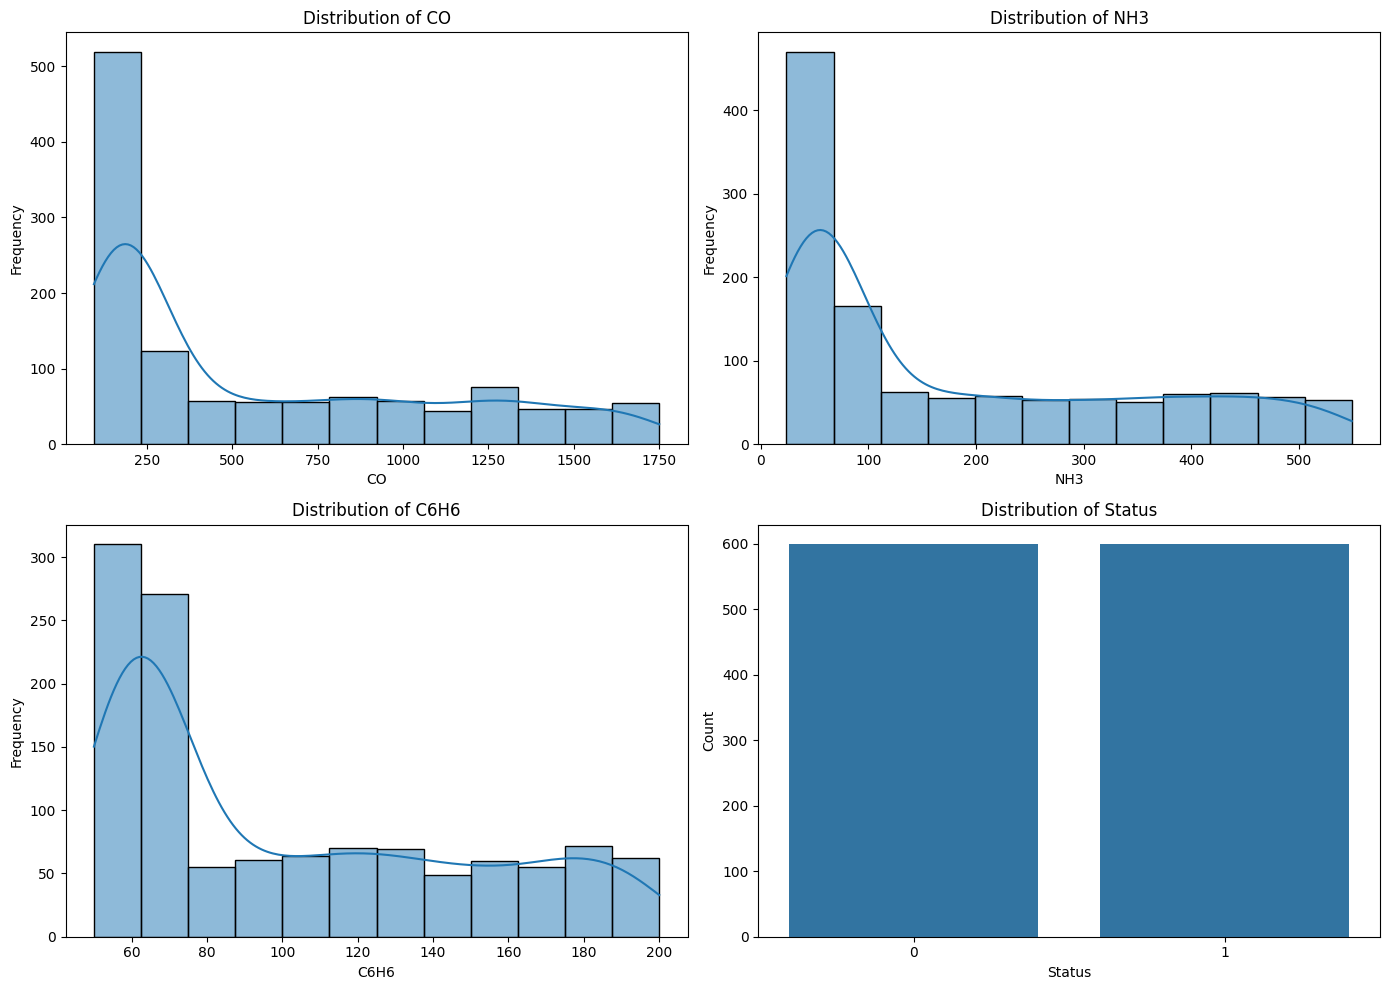

Visualized distributions of feature and target variables.


In [ ]:
features = ['CO', 'NH3', 'C6H6']
target = 'Status'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

sns.countplot(x=df[target], ax=axes[len(features)])
axes[len(features)].set_title(f'Distribution of {target}')
axes[len(features)].set_xlabel(target)
axes[len(features)].set_ylabel('Count')

for j in range(len(features) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("Visualized distributions of feature and target variables.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Menangani Missing Values
missing_values = df.isnull().sum()
df[features] = df[features].fillna(df[features].mean())

In [ ]:
# Menghapus Duplikat
df = df.drop_duplicates()

In [ ]:
# Standarisasi
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

In [ ]:
# Outlier Handling
for feature in features:
    Q1 = df_scaled[feature].quantile(0.25)
    Q3 = df_scaled[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_scaled = df_scaled[(df_scaled[feature] >= lower_bound) & (df_scaled[feature] <= upper_bound)]

In [ ]:
df_scaled.head()

,CO,NH3,C6H6,Status
0,-0.857543,-0.706774,-0.796245,0
1,-0.765018,-0.694499,-0.817781,0
2,-0.692180,-0.694499,-0.731638,0
3,-0.792579,-0.890899,-0.602424,0
4,-0.814233,-0.817249,-0.817781,0


In [ ]:
X = df_scaled.drop(columns=['Status'])
y = df_scaled['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Requirements
!pip freeze > requirements.txt
!cat requirements.txt